In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
%reload_ext autoreload
%autoreload 2

pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)

# k-Nearest Neighbors

## What is it?

- Simple, easy-to-implement supervised machine learning algorithm
    - Supervised machine learning algorithm: one that relies on labeled input data 
    - Used to solve classification or regression problems (more commonly used for classification though)
        - Classification = predicting the class of given data points (ex. is an email spam or not?)
        - Regression = predicting a continuous output variable (ex. what is the predicted price of that house?)
- K-Nearest Neighbors essentially groups 'similar' points, i.e. points that are close together in the feature space
    - The number of groups is based on K, which is a hyperparameter
        - This must be determined by the designer (i.e. you!)
        - Small K provides the most flexible fit with low bias and high variance
        - Large K more resilient to outliers, have smoother decision boundaries with lower variance and higher bias
        
        
##### Sources
- [Machine Learning Basics](https://towardsdatascience.com/machine-learning-basics-with-the-k-nearest-neighbors-algorithm-6a6e71d01761)
- [Machine Learning Classifiers](https://towardsdatascience.com/machine-learning-classifiers-a5cc4e1b0623)
- [K-Nearest Neighbor Walkthrough](https://kevinzakka.github.io/2016/07/13/k-nearest-neighbor/)

In [2]:
# read in clean df
df = pd.read_csv('Data/combined_df_clean.csv')

In [3]:
df.head(5)

,Unnamed: 0,Team,Age,W,L,PW,PL,MOV,SOS,SRS,ORtg,DRtg,NRtg,Pace,FTr,3PAr,TS%,eFG%,TOV%,ORB%,FT/FGA,Opp_eFG%,Opp_TOV%,DRB%,Opp_FT/FGA,year,playoff
0,0,Golden State Warriors,26.6,67.0,15.0,65.0,17.0,10.10,-0.09,10.01,111.6,101.4,10.2,98.3,0.239,0.311,0.571,0.540,13.1,24.1,0.184,0.470,14.3,74.5,0.217,2015,1
1,1,Los Angeles Clippers,28.8,56.0,26.0,58.0,24.0,6.59,0.22,6.80,112.4,105.5,6.9,94.7,0.303,0.322,0.565,0.533,11.6,22.8,0.215,0.493,13.2,75.7,0.231,2015,1
2,2,San Antonio Spurs,29.8,55.0,27.0,58.0,24.0,6.20,0.14,6.34,108.5,102.0,6.5,93.8,0.256,0.269,0.555,0.517,13.1,23.4,0.200,0.484,13.3,77.3,0.190,2015,1
3,3,Atlanta Hawks,27.8,60.0,22.0,56.0,26.0,5.43,-0.68,4.75,108.9,103.1,5.8,93.9,0.259,0.321,0.563,0.527,13.5,21.4,0.201,0.492,14.9,73.4,0.185,2015,1
4,4,Portland Trail Blazers,27.0,51.0,31.0,53.0,29.0,4.23,0.18,4.41,108.2,103.7,4.5,94.2,0.225,0.316,0.544,0.508,12.6,24.2,0.180,0.476,11.3,76.2,0.182,2015,1


In [4]:
# y is what we're trying to predict, also we are dropping team, year and playoff columns (can't use the variable we're trying to predict!)
y_knn = df['playoff'].values
X_knn = df.drop(['Team', 'year', 'playoff'], axis = 1).values

In [6]:
# Import necessary modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X_knn, y_knn, test_size = 0.2, random_state=42, stratify=y_knn)

# Create a k-NN classifier with 2 neighbors: knn
knn = KNeighborsClassifier(n_neighbors = 2)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Print the accuracy
print(knn.score(X_test, y_test))

0.8


### Observation

- The accuracy of the model was 0.80, which means that it correctly predicted a playoff team 80% of the time. For an out-of-the box k-NN classifier this isn't bad but I think we can do better.


### Overfitting and underfitting

- Overfitting refers to a model that models the training data too well. 
    - In essence, it learns the training data so well that it performs poorly on any previously unseen data
    - Metaphorically, overfitting would be like getting a shoe that perfectly fits your foot which is awesome but then you lend them to your buddy LeBron James for a pick-up game. They're probably not going to feel good on LeBron's feet even if they are size 15...(because they are made for YOUR feet)
    - This is a little harder to determine, but generally if a model performs well on training data and poorly on test data, then there may be some overfitting going on.
- Underfitting is when a model can't model the training data or generalize to new data
    - Another metaphor, would be like buying a kid's shoe and trying to wear it; they're probably not going to fit your feet or LeBron's feet
    - However this is easier to detect as it will be obvious from the performance on the training data
- Let's see how it performs over a range of K (differing number of numbers)

#### Sources

- [Machine Learning Mastery: Overfitting and Underfitting](https://machinelearningmastery.com/overfitting-and-underfitting-with-machine-learning-algorithms/)

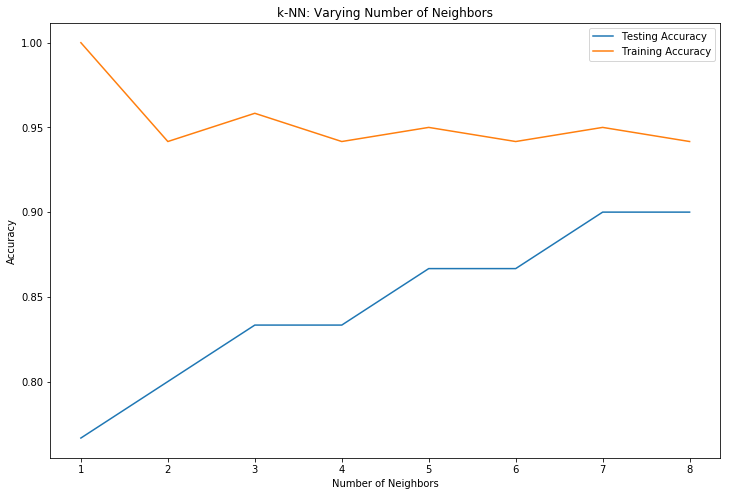

In [7]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.figure(figsize = (12, 8))
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show();

In [8]:
# Create a k-NN classifier with 7 neighbors: knn
knn = KNeighborsClassifier(n_neighbors = 7)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

# Print the accuracy
print(knn.score(X_test, y_test))

0.9


### Feature Scaling

- As we can see from the graph above, when we increase the neighbors to 7, we get a pretty significant bump in regards to accuracy (from 0.8 to 0.9) 
- However, there is one thing we've left out up until this point: feature scaling
- What is feature scaling?
    - Instead of me rambling, I found an article on [Wikipedia](https://en.wikipedia.org/wiki/Feature_scaling#Motivation) that does a good job at explaining it more concisely: 
        - _Since the range of values of raw data varies widely, in some machine learning algorithms, objective functions will not work properly without normalization. For example, the majority of classifiers calculate the distance between two points by the Euclidean distance. If one of the features has a broad range of values, the distance will be governed by this particular feature. Therefore, the range of all features should be normalized so that each feature contributes approximately proportionately to the final distance. Another reason why feature scaling is applied is that gradient descent converges much faster with feature scaling than without it._
- Essentially, it takes all the variables and puts them on the same scale 
    - In this case, our values our all over the place: for example offensive rating has values in the 100's while true shooting percentage has values around 0.50
    - What scaling would do in this case would be to 'normalize' these two features so that they are on the same scale
- Why is this important?
    - k-NN's default metric for calculating distance between points is Euclidean distance (i.e. straight-line distance)
    - features with a broad range of values can govern the model
    - by normalizing, each feature's effect will be approximately proportional
        
        
#### Sources

- [Wikipedia: Feature Scaling](https://en.wikipedia.org/wiki/Feature_scaling#Motivation)

In [9]:
# import StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
# Create a k-NN classifier with 7 neighbors: knn
knn = KNeighborsClassifier(n_neighbors = 7)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

# Print the accuracy
print(knn.score(X_test, y_test))

0.8


In [11]:
from sklearn.metrics import classification_report, confusion_matrix  

# generate confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))

[[11  3]
 [ 3 13]]
              precision    recall  f1-score   support

           0       0.79      0.79      0.79        14
           1       0.81      0.81      0.81        16

   micro avg       0.80      0.80      0.80        30
   macro avg       0.80      0.80      0.80        30
weighted avg       0.80      0.80      0.80        30



### Observation

Here we introduced a confusion matrix and a classification report. We'll start by explaining what information the confusion matrix is giving us.

A confusion matrix is a table where the rows represent the actual value (or class) and the columns represent the predicted value. So in our case, the rows represent whether a team made the playoffs or not and the columns represent the predictions of whether a team made the playoffs or not. 
- If a team made the playoffs and the classifier predicted they would make the playoffs than that is a `true positive`
- If a team made the playoffs and the classifier predicted they wouldn't, than that is a `false negative`
- If a team did not make the playoffs but the classifier predicted they would, than that is a `false positive`
- If a team did not make the playoffs and the classifier predicted they wouldn't, than that is a `true negative`

Now you may be wondering, what is the classification report?
- Glad you asked!
- These metrics go a little deeper and essence help us determine the exactness and completeness of the model. 
- Precision is the exactness, i.e. it focuses on the `positives` of the model -- both true and false and asks the question: what % of your predictions were correct?
    - We want to minimize the number of `false positives`, or in this specific case predicting a playoff team when in fact they did not make the playoffs
- Recall is completeness, or in other words: what % of the positive cases did you catch? 
    - this focuses on the ratio of `true positives` to the sum of `true positives` and `false negatives` (i.e. teams that actually went to the playoffs but were predicted to not go)
    
Let's visualize the confusion matrix to get a better feel for it.  

#### Sources

- [Understanding the Classification Report](https://muthu.co/understanding-the-classification-report-in-sklearn/)
- [Demystifying Confusion Matrix](https://towardsdatascience.com/demystifying-confusion-matrix-confusion-9e82201592fd)

In [12]:
import itertools

#Evaluation of Model - Confusion Matrix Plot
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[11  3]
 [ 3 13]]


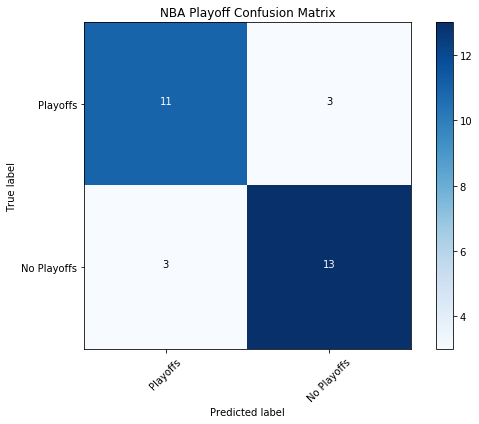

In [13]:
# compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# plot confusion matrix
plt.figure(figsize = (8, 6))
plot_confusion_matrix(cnf_matrix, classes=['Playoffs', 'No Playoffs'], title = 'NBA Playoff Confusion Matrix');

### Observation

Ok, unfortunately it still looks like normalizing the data _decreased_ the model's accuracy! So let's go back to the drawing board to see what the best values of K are for the normalized data.

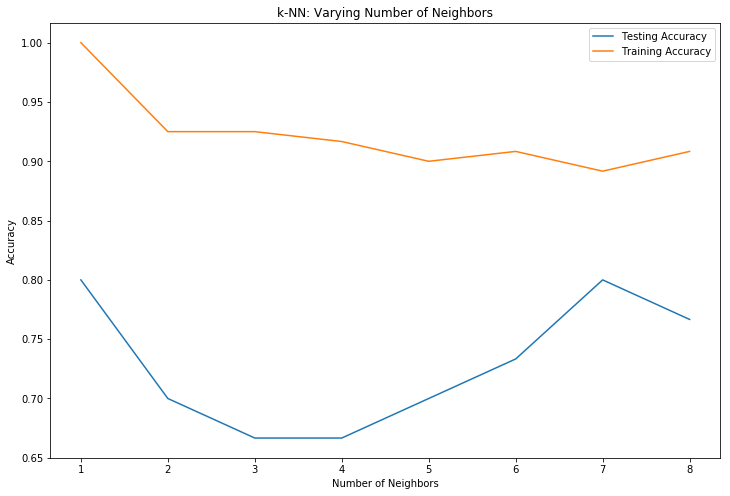

In [14]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.figure(figsize = (12, 8))
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show();

### Observation

- Even more interesting! By normalizing the data, we've actually made it perform worse! Was not expecting that...
- While an accuracy of 80%-90% (depending on whether or not we normalize the data) is not bad, I have a feeling that there might be another algorithm we can use that may prove to be more accurate
- The reasoning for starting with k-NN was largely due to it being the first algorithm I learned about, and that it is easy to implement due to the fact you don't need to tune several parameters
- However, it is flawed in that as the number of examples and/ or variables increase, the algorithm gets slower and slower
    - Does not make it practical for larger data sets, or as is the case with our specific data, data sets with a high number of variables
    
#### Sources

- [Machine Learning Basic: k-NN](https://towardsdatascience.com/machine-learning-basics-with-the-k-nearest-neighbors-algorithm-6a6e71d01761)

## Logisitic Regression

- What is it?
    - Is used to solve the target variable (i.e. what we're trying to predict) is categorical
        - in this case: did a team make the playoffs or not? 
        - also called a binary logistic regression (only 2 possible outcomes)
    - Uses logit (log-odds) function, which is the ratio of probability of success to probability of failure
    - taking the inverse of this gives us the `sigmoid function` (see graph below) [(1)](https://web.stanford.edu/class/archive/cs/cs109/cs109.1178/lectureHandouts/220-logistic-regression.pdf)
    - as a result, we get a distinctive s-shaped curve, that gives a value of probability ranging from 0 to 1
    
![Sigmoid Function & Graph](sigmoid_func.png)
                
        
#### Sources

- [Logistic Regression - Stanford](https://web.stanford.edu/class/archive/cs/cs109/cs109.1178/lectureHandouts/220-logistic-regression.pdf)
- [Logistic Regression. Simplified.](https://medium.com/data-science-group-iitr/logistic-regression-simplified-9b4efe801389)
- [Logistic Regression - Detailed Overview](https://towardsdatascience.com/logistic-regression-detailed-overview-46c4da4303bc)

In [16]:
# y is what we're trying to predict, also we are dropping team, year and playoff columns (can't use the variable we're trying to predict!)
y_logreg = df['playoff'].values
X_logreg = df.drop(['Team', 'year', 'playoff'], axis = 1).values

In [18]:
# Import the necessary modules
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_logreg, y_logreg, test_size = 0.2, random_state=1)

# Create the classifier: logreg
logreg = LogisticRegression(solver = 'liblinear')

# Fit the classifier to the training data
logreg.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = logreg.predict(X_test)

# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[10  2]
 [ 0 18]]
              precision    recall  f1-score   support

           0       1.00      0.83      0.91        12
           1       0.90      1.00      0.95        18

   micro avg       0.93      0.93      0.93        30
   macro avg       0.95      0.92      0.93        30
weighted avg       0.94      0.93      0.93        30



In [19]:
# Plotting a ROC Curve

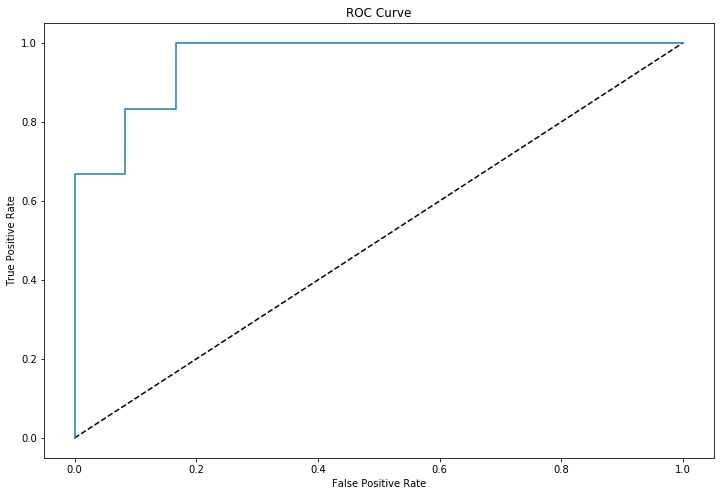

In [20]:
# Import necessary modules
from sklearn.metrics import roc_curve

# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.figure(figsize = (12, 8))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()